# Understanding and Visualizing Decision Boundaries in a Deep Neural Network

In [36]:
import numpy as np
import math
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from IPython.display import display, Math

## The dataset

In [37]:
# Generate the dataset
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)
y = y.reshape(-1, 1)

# Instead of being [0, 1, 2, 3] unique classes become [1, 2, 3, 4].
y = y + 1

print(f"X shape is (m examples, n features): {X.shape}")
print(f"y shape is (m examples, 1): {y.shape}")
print(f"List of all unique classes in y: {np.unique(y)}")

X shape is (m examples, n features): (400, 2)
y shape is (m examples, 1): (400, 1)
List of all unique classes in y: [1 2 3 4]


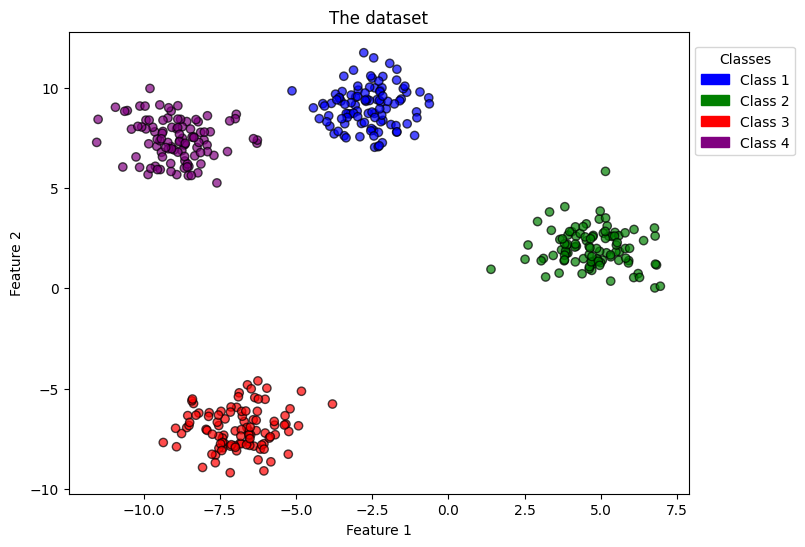

In [38]:
# Define a colormap with exactly 4 distinct colors
colors = ['blue', 'green', 'red', 'purple']  # You can customize these
cmap = ListedColormap(colors)

# Plot the dataset
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("The dataset")

# Create a legend with class labels
legend_patches = [mpatches.Patch(color=colors[i], label=f'Class {i+1}') for i in range(4)]
plt.legend(handles=legend_patches, title="Classes", loc="center left", bbox_to_anchor=(1, 0.85))

plt.show()

## The ANN architecture we will be using:

1. **Input Layer**  
   - **2 neurons** (corresponding to 2 features in the dataset)  
   - **No activation function** (raw inputs are directly passed to the hidden layer)  

2. **Hidden Layers (Using ReLU Activation)**  
   - **First Hidden Layer:** 4 neurons, ReLU activation  
   - **Second Hidden Layer:** 4 neurons, ReLU activation  
   - **Third Hidden Layer:** 4 neurons, ReLU activation  

3. **Output Layer (With Softmax Activation)**  
   - **4 neurons** (one per class in a one-hot encoded output)  
   - **Softmax activation function** (converts raw scores into probabilities summing to 1)  

4. **Loss Function**  
   - **Cross-Entropy Loss** (measures prediction accuracy by comparing predicted probabilities with true labels)  

5. **Other Hyperparameters**  
   - **Max Iterations:** 10,000 (ensures sufficient training)  
   - **Learning Rate:** 0.01 (controls step size in weight updates)  
   - **Random State:** 0 (ensures reproducibility)

In [39]:
# Define the ANN with 4 layers with 4 neurons each
hidden_layers = (4, 4, 4)
model = MLPClassifier(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    max_iter=10000,
    random_state=0,
    learning_rate_init=0.01)

### One-hot encode the target variable

In [40]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

print(f"y_encoded shape: {y_encoded.shape}")
print("------")
print(f"An extract of the first five rows of y_encoded: \n {y_encoded[0:5,:]}")


y_encoded shape: (400, 4)
------
An extract of the first five rows of y_encoded: 
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


### Train the model

In [41]:
# Train the model
model.fit(X, y_encoded)

MLPClassifier(hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.01,
              max_iter=10000, random_state=0)

### The model's weights and baises

The variable `model.coefs_` consists of four numpy arrays.

Each array represents a weight matrix between two consecutive layers in the model.

In [42]:
for i in range(len(model.coefs_)):
    print(f"model.coefs_ layer n°{i+1} shape is: {model.coefs_[i].shape}  ")

model.coefs_ layer n°1 shape is: (2, 4)  
model.coefs_ layer n°2 shape is: (4, 4)  
model.coefs_ layer n°3 shape is: (4, 4)  
model.coefs_ layer n°4 shape is: (4, 4)  


The variable `model.intercepts_` consists of four numpy arrays.

Each array represents the biase vector of each layer in the model.

In [43]:
for i in range(len(model.intercepts_)):
    print(f"model.intercepts_ layer n°{i+1} shape is: {model.intercepts_[i].shape}  ")

model.intercepts_ layer n°1 shape is: (4,)  
model.intercepts_ layer n°2 shape is: (4,)  
model.intercepts_ layer n°3 shape is: (4,)  
model.intercepts_ layer n°4 shape is: (4,)  


## Generate a grid for visualization

In [44]:
# Generate a grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Explanation of this 2 lines of code with chatgpt:
grid = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)  # https://chatgpt.com/share/67a9f604-6b98-8003-9f48-83fe24781b4a

# The final grid array has shape (10000, 2), where each row is a coordinate [x, y].
print(f"grid shape is {grid.shape}")
grid

grid shape is (10000, 2)


array([[-12.5352144 , -10.18203076],
       [-12.32824721, -10.18203076],
       [-12.12128002, -10.18203076],
       ...,
       [  7.54060302,  12.73445529],
       [  7.74757021,  12.73445529],
       [  7.9545374 ,  12.73445529]])

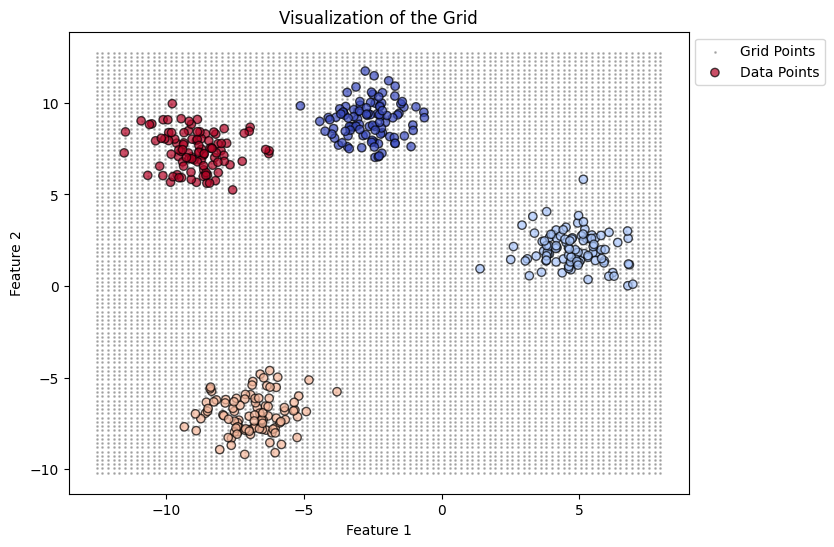

In [45]:
# Visualization of the Grid
plt.figure(figsize=(8, 6))
plt.scatter(grid[:, 0], grid[:, 1], s=1, color="gray", alpha=0.5, label="Grid Points")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Data Points")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of the Grid")

# Create a legend with class labels
legend_patches = [mpatches.Patch(color=colors[i], label=f'Class {i}') for i in range(4)]
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## For all points on the grid, get the activation values of the 3 hidden layers

In [46]:
# Get the ReLU activation values for all the points on grid and for all the neurons of the hidden layers
activations = [grid]  # Start with the input layer
layer_outputs = grid
hidden_layer_nb = 0

for weights, biases in zip(model.coefs_[:-1], model.intercepts_[:-1]):  # Get the weights and biases of the hidden layers
    weight_sum_layer_outputs = (layer_outputs @ weights) + biases  # Get the weight sum for each hidden layer
    layer_outputs = np.maximum(0, weight_sum_layer_outputs)  # Apply ReLU activation function
    activations.append(layer_outputs)  # Add the activation outputs of the hidden layers to the activation outputs of the input layer.
    hidden_layer_nb += 1

    print("---")
    print(f"Hidden layer n°{hidden_layer_nb}")
    print(f"Weights matrix shape: {weights.shape}")
    print(f"Biases vector shape: {biases.shape}")
    print(f"Weight sum matrix shape: {weight_sum_layer_outputs.shape}")
    print(f"layer_outputs shape: {layer_outputs.shape}")

---
Hidden layer n°1
Weights matrix shape: (2, 4)
Biases vector shape: (4,)
Weight sum matrix shape: (10000, 4)
layer_outputs shape: (10000, 4)
---
Hidden layer n°2
Weights matrix shape: (4, 4)
Biases vector shape: (4,)
Weight sum matrix shape: (10000, 4)
layer_outputs shape: (10000, 4)
---
Hidden layer n°3
Weights matrix shape: (4, 4)
Biases vector shape: (4,)
Weight sum matrix shape: (10000, 4)
layer_outputs shape: (10000, 4)


## For all points on the grid, get the activation values of the output layer

We calculate the weight sum (**z**) of all the neurons of the output layer.

**z** will later be passed passed to the **softmax activation function** to draw the final decision boundary that best seperate our **4** classes.

For now, we only need to get **z** for each neuron of the output layer to draw per output neuron the decision boundaries for each value of **z**.

In [47]:
# Get the output layer values (logits) for all the points on grid
z_out = layer_outputs @ model.coefs_[-1] + model.intercepts_[-1]

print(f"z_out matrix shape: {z_out.shape}")

z_out matrix shape: (10000, 4)


## Plot the decision boundaries for all neurons

There are 16 neurons (4 layers and 4 neurons per layer = 4 x 4)

In [48]:
# Calculate total number of subplots needed for the 3 hidden layers
num_subplots = sum(layer.shape[1] for layer in model.coefs_)

# Dynamically calculate figure size
cols = 2  # Number of columns
rows = math.ceil(num_subplots / cols) # Calculate rows needed

fig_width = 10  # Base width per column
fig_height = 6  # Base height per row
figsize = (cols * fig_width, rows * fig_height)

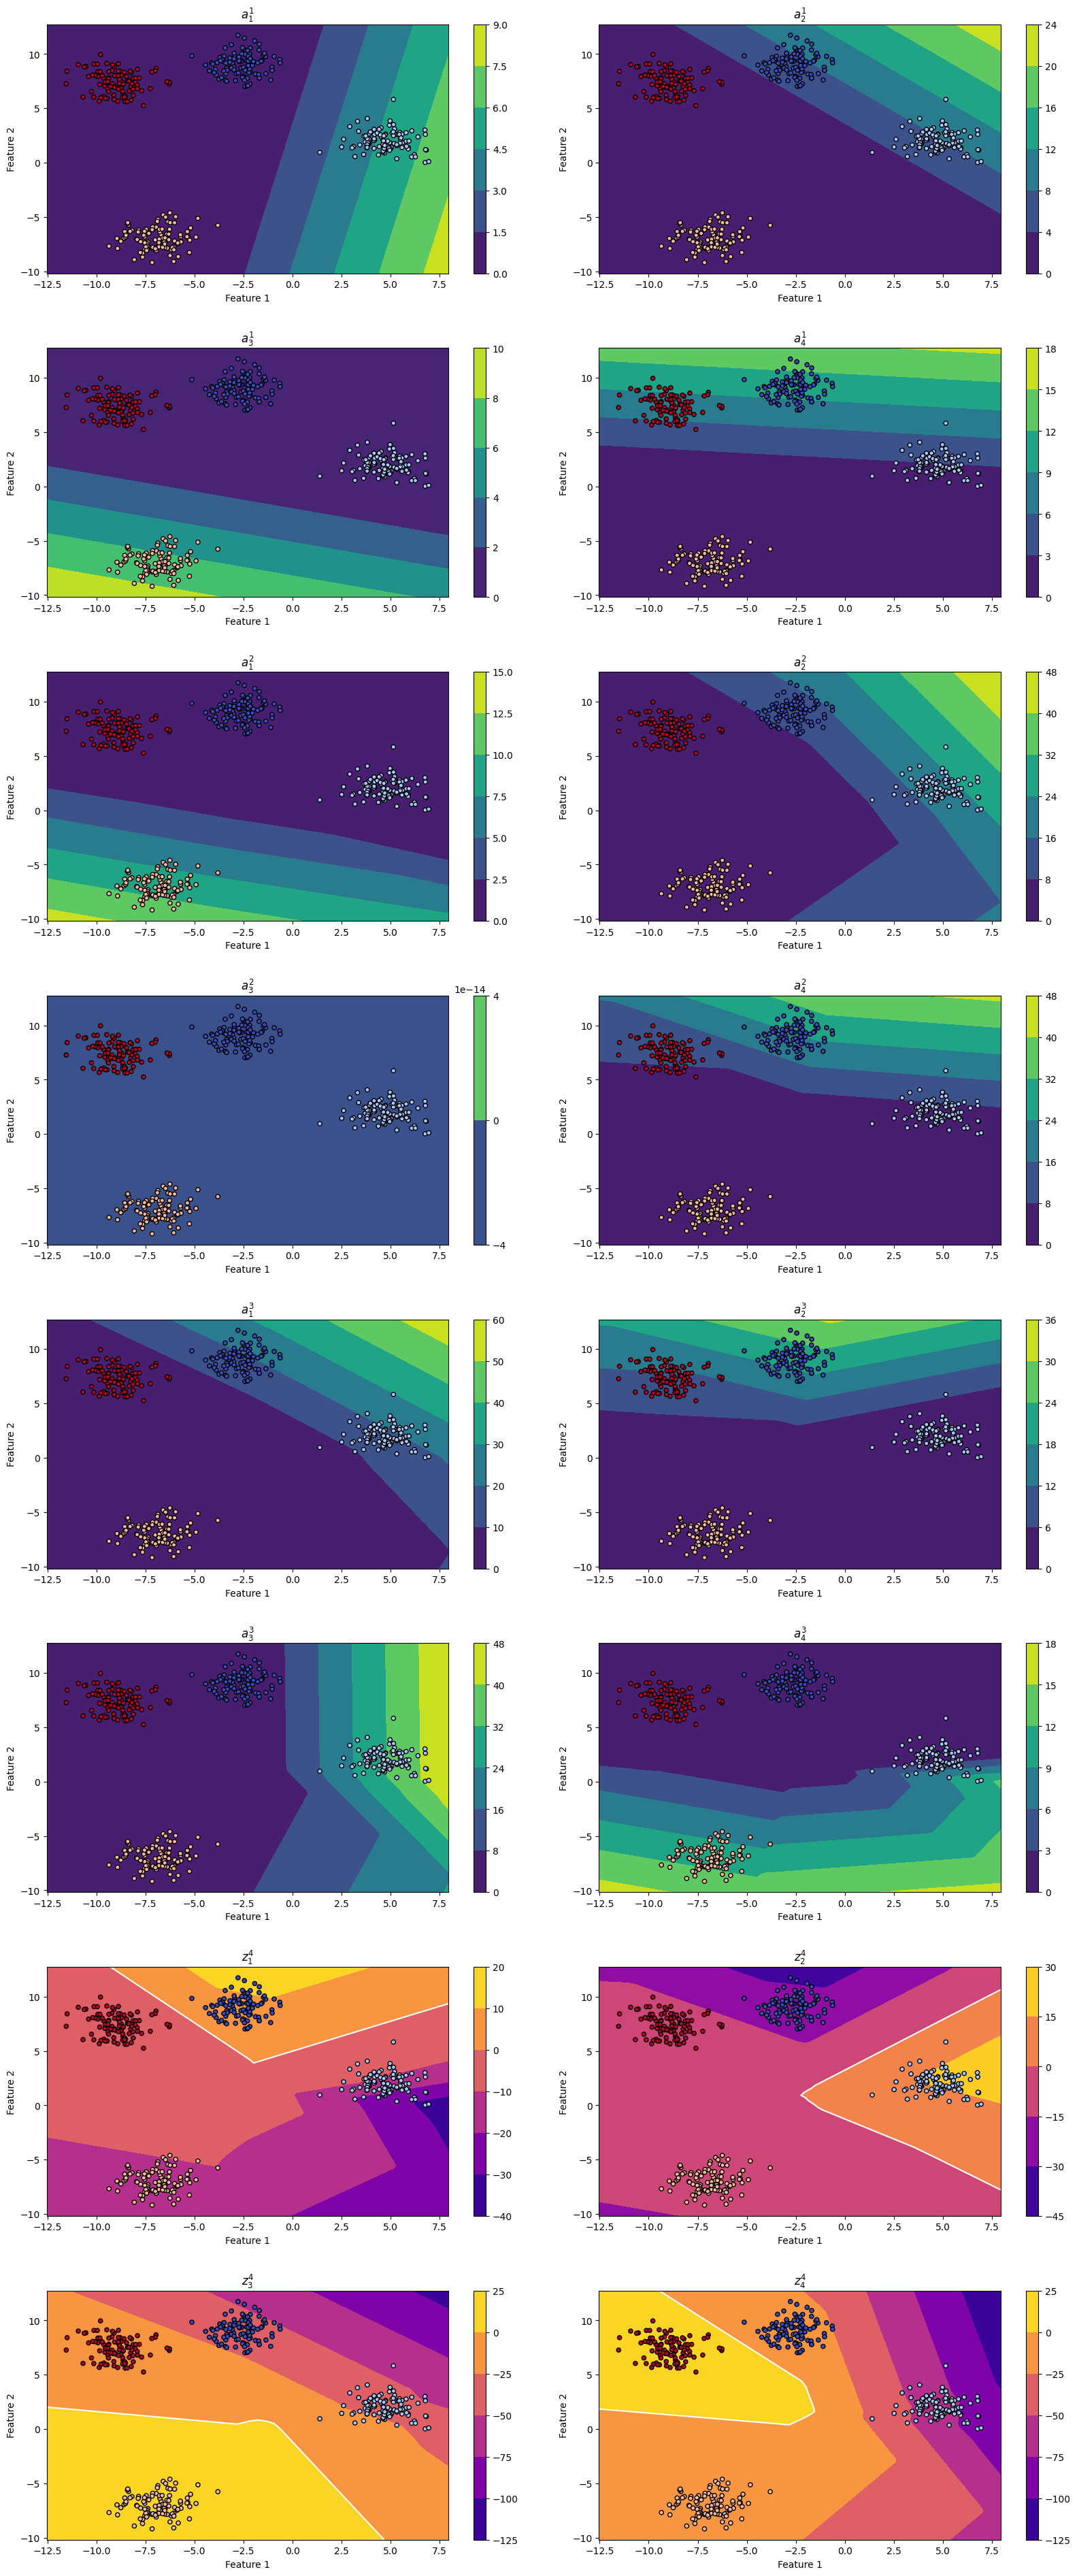

In [49]:
# Plot the decision boundaries
fig, axes = plt.subplots(rows, cols, figsize=figsize)  # Dynamically adjust the figure size
axes = axes.ravel()  # Flatten the axes for easy indexing

# Track subplot index
subplot_idx = 0

# Hidden layers
for i, layer_activation in enumerate(activations[1:]):  # The 3 hidden layers
    for j in range(layer_activation.shape[1]):  # Iterate over neurons in the layer
        ax = axes[subplot_idx]
        contour = ax.contourf(xx, yy, layer_activation[:, j].reshape(xx.shape), levels=5, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=20)  # Add scatter plot for X
        ax.set_title(fr"$a^{i+1}_{j+1}$")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        subplot_idx += 1

# Output layer
for j in range(z_out.shape[1]):
    ax = axes[subplot_idx]
    contour = ax.contourf(xx, yy, z_out[:, j].reshape(xx.shape), levels=5, cmap='plasma')
    fig.colorbar(contour, ax=ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=20)  # Add scatter plot for X
    decision_boundary = ax.contour(xx, yy, z_out[:, j].reshape(xx.shape), levels=[0], colors='white')
    ax.set_title(fr"$z^4_{j+1}$")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    subplot_idx += 1

# Remove unused subplots
for ax in axes[subplot_idx:]:
    fig.delaxes(ax)

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()

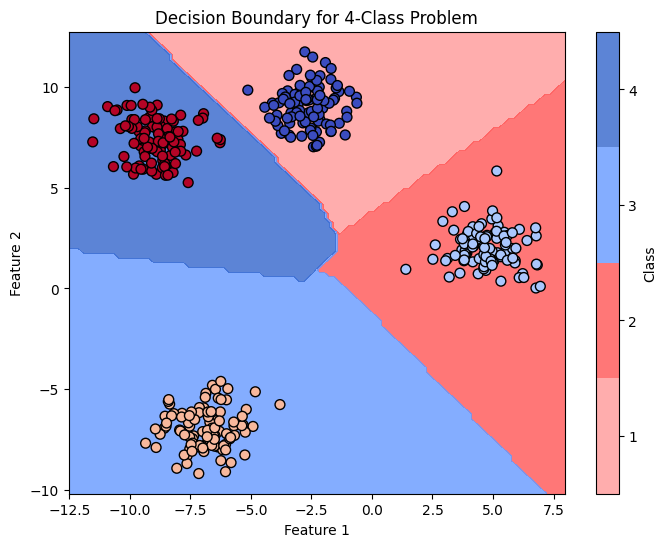

In [50]:
# Predict class probabilities for each point in the grid
z_out = model.predict_proba(grid)  # Use predict_proba instead of predict
z_out = np.argmax(z_out, axis=1) + 1 # Take the class with the highest probability
z_out = z_out.reshape(xx.shape)  # Reshape to match the grid shape

# Define a colormap with exactly 4 distinct colors
colors = ['#FF9999', '#FF5555', '#6699FF', '#3366CC']  # Custom 4 colors
cmap = ListedColormap(colors)

# Define the boundaries for classification regions
boundaries = np.arange(0.5, 5.5, 1)  # Ensures 4 distinct classes (1, 2, 3, 4)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, z_out, levels=boundaries, cmap=cmap, alpha=0.8)

# Scatter plot the original points with their classes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=50)

# Add a colorbar with 4 distinct ticks
cbar = plt.colorbar(contour)
cbar.set_ticks([1, 2, 3, 4])  # Explicitly set class labels
cbar.set_label("Class")

# Set plot titles and labels
plt.title("Decision Boundary for 4-Class Problem")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()
